## Project Title: How would student enrollment, borough, and median household income potentially correlate with SAT performance?

# Introduction  

In this project, I will use the dataset *Average SAT Scores for NYC Public Schools* from **NYC Open Data(source of Data)**
to investigate about the mean SAT scores in each NYC public school, and how the means of these scores of each school can be correlated with the school's location and student enrollment. 

**In general, I would try to solve these main questions in the project:**
-How are the locations(borough) of each school correlated with the school's overall performance in SAT Exam?
-Is the overall performance on SAT related with school's number of student enrollment?

where **Y variable** would be the mean of total SAT score,
and the **X variables** would be the location (borough) and student enrollment of each school. 

Since I will also scrape extra data of median household income of different districts at NYC and combine it with 
my chosen X variables, we will also address a **subsequent question**: Does median household income correlate with 
mean SAT score of a school?

To have a better understanding of this project, readers need to know the **basic background of our project**:
 -SAT is a pencil-and-paper test administered by the College Board with the purpose of  measuring a high school student's 
readiness for college, and provide colleges with one common data point that can be used to compare all applicants.

In other words, SAT Score is widely used for college applications in America. 

## Literature Review 

Sackett, Kuncel and several other researchers have investigated into the relationship between students' socioeconomic status and their academic performances such as SAT scores. In their article 'The Role of Socioeconomic Status in SAT-Grade Relationships and in College Admissions Decisions', they reached a key finding that students' general academic 
achievements are highly correlated with their socioeconomic status(2012). 

Hess also mentioned in her article that richer students tend to achieve high SAT score more easily because they could 
pay for tuitions of better-funded schools with better academic support and they could also afford to take the 
SAT Exam several times (2019).

What's more, Zumbrun pointed out in his article 'SAT Scores and Income Inequality: How Wealthier Kids Rank Higher'
that students from wealthier families could not only take advantages on preparation for SAT, but also be equipped with
enough financial budgets to pay for expensive college tuitions (2014). 

## Research Directions:
These authors all focus on the general impact of socioeconomic backgrounds on students' academic performances such as SAT scores and college GPA across America asa whole.

Nevertheless **in this paper**, our analysis differ from the above articles in the way that we will focus on correlation between economic status and students' mean SAT score **in New York City specifically**. We will also add insights to the existing literature through joint investigations of student enrollment and median household income and how they could be correlated with students' SAT performances.

Since residents in different regions have varying economic conditions, this can be illustrated by different boroughs, which is our X variable; the variation in scale of school indicates potential educational funds and resources of a school, which could also be demonstrated by our X variable, student enrollment. 

Overall, we will provide different measures of analysis including summary statistics and visualizations such as 
boxplot, scatterplot, heat maps, simple linear regression and multivariate linear regressions in order to add economic insights to the research question "How would student enrollment, borough, and median household income potentially correlate with SAT performance". We will discuss about how the X variables would correlate with mean SAT score. 

In [ ]:
# Before we start, we first import some packages we need

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

# Project One 

## Creating Data Frame, Data Cleaning, and Column Extraction

In [66]:
df_SAT=pd.read_csv(r"C:\Users\10036\Desktop\多伦多事宜\ECO225\Proejct1\scores.csv")
df_SAT_cleaned = df_SAT.dropna()
df1_SAT = df_SAT_cleaned[['School ID', 
          'School Name', 
          'Borough', 
          'Zip Code',
          'Student Enrollment',
          'Percent Tested',
          'Percent Asian', 
          'Average Score (SAT Math)', 
          'Average Score (SAT Reading)', 
          'Average Score (SAT Writing)']]
df1_SAT = df1_SAT.drop_duplicates(subset=['School ID'])
df1_SAT

,School ID,School Name,Borough,Zip Code,Student Enrollment,Percent Tested,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,10002,1735.0,91.00%,38.50%,657.0,601.0,601.0
3,02M294,Essex Street Academy,Manhattan,10002,358.0,78.90%,5.90%,395.0,411.0,387.0
4,02M308,Lower Manhattan Arts Academy,Manhattan,10002,383.0,65.10%,8.60%,418.0,428.0,415.0
5,02M545,High School for Dual Language and Asian Studies,Manhattan,10002,416.0,95.90%,88.90%,613.0,453.0,463.0
6,01M292,Henry Street School for International Studies,Manhattan,10002,255.0,59.70%,13.20%,410.0,406.0,381.0
...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,11691,381.0,44.60%,4.20%,372.0,362.0,352.0
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,11694,368.0,38.50%,3.50%,357.0,381.0,376.0
432,27Q262,Channel View School for Research,Queens,11694,683.0,76.60%,6.00%,427.0,430.0,423.0
433,27Q351,Rockaway Collegiate High School,Queens,11694,397.0,46.50%,5.00%,399.0,403.0,405.0


**Explanation**:

In the cell above, three dataframes were created: df_SAT, df_SAT_cleaned, and df1_SAT, where df_SAT is the original dataset we imported from csv file; df_SAT_cleaned is the cleaned version of df, dropping all observartions with missing values; and df1_SAT chooses the columns we need (which includes the X and Y variables) to form a new, cleaned data frame with no missing values or duplications. 

From the above process we understand that among all 435 schools, there are 374 with no missing values and can be used
in our project analysis.

## Summary Statistics for X and Y variables

In [67]:
# We create a new column, "Total", and rename some other variables

df1_SAT.rename(columns={'Zip Code':'Zip_Code',
                    'Student Enrollment':'Student_Enrollment', 
                    'Percent Tested':'Percent_Tested',
                    'Percent Asian':'Percent_Asian', 
                    'Average Score (SAT Math)':'Average_Math_Score', 
                    'Average Score (SAT Reading)':'Average_Reading_Score', 
                    'Average Score (SAT Writing)':'Average_Writing_Score'}, 
               inplace=True)

df1_SAT['Total'] = df1_SAT['Average_Math_Score'] + df1_SAT['Average_Reading_Score'] + df1_SAT['Average_Writing_Score']

# We change 'Percent_Testes', 'Percent_Asian' from percentages to decimals
df1_SAT['Percent_Tested'] = df1_SAT['Percent_Tested'].str.rstrip('%').astype('float') / 100.0
df1_SAT['Percent_Asian'] = df1_SAT['Percent_Asian'].str.rstrip('%').astype('float') / 100.0

# We create a new variable 'Number Tested'
df1_SAT['Number Tested'] = df1_SAT['Percent_Tested']*df1_SAT['Student_Enrollment']

df1_SAT.head()

,School ID,School Name,Borough,Zip_Code,Student_Enrollment,Percent_Tested,Percent_Asian,Average_Math_Score,Average_Reading_Score,Average_Writing_Score,Total,Number Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,10002,1735.0,0.910,0.385,657.0,601.0,601.0,1859.0,1578.850
3,02M294,Essex Street Academy,Manhattan,10002,358.0,0.789,0.059,395.0,411.0,387.0,1193.0,282.462
4,02M308,Lower Manhattan Arts Academy,Manhattan,10002,383.0,0.651,0.086,418.0,428.0,415.0,1261.0,249.333
5,02M545,High School for Dual Language and Asian Studies,Manhattan,10002,416.0,0.959,0.889,613.0,453.0,463.0,1529.0,398.944
6,01M292,Henry Street School for International Studies,Manhattan,10002,255.0,0.597,0.132,410.0,406.0,381.0,1197.0,152.235


**Explanations**

Here df1 is updated with rename() function, and one column is added to df1. From the updated df1 we can understand that some of our column names are changed; a new variable called *Total* is also created to represent the Y variable Mean of Total SAT Score.

In [68]:
df1_SAT.Borough.describe()

count          374
unique           5
top       Brooklyn
freq           109
Name: Borough, dtype: object

**Explanation**: Above is summary statistics for my X variable, borough. 

In [62]:
df1_SAT.Student_Enrollment.describe()

count     374.000000
mean      756.459893
std       774.287044
min       142.000000
25%       397.250000
50%       482.500000
75%       660.500000
max      5447.000000
Name: Student_Enrollment, dtype: float64

**Explanation**: Above is summary statistics for my X variable, student enrollment.

In [7]:
df1_SAT.Total.describe()

count     374.000000
mean     1275.347594
std       194.866056
min       924.000000
25%      1157.000000
50%      1226.000000
75%      1327.000000
max      2144.000000
Name: Total, dtype: float64

**Explanation**: Above is summary statistics for my Y variable, average total SAT score of each school.

**Explanation**: 

In the above code chunks, I created summary statistics for my X and Y variables. From these tables we could understand about the summary statistics for **X variables: borough, student enrollment**, and **Y variable: Mean of Total SAT Score**.

## Project Two

### THE MESSAGE!

As the introduction stated, our main concerns from Project One are: **correlation between location of each school and the school's mean SAT score** (some districts might have overall better performances in SAT scores than others), and **relationship between mean SAT score and each school's student enrollment** (schools with more or fewer student enrollments tend to have higher mean SAT score).  

### Plotting relationships of concern & Finetune the Details

**Concern 1: let's group by borough and create a boxplot to show each borough's SAT score distribution**

Text(0.5, 1.0, 'Mean SAT score Distribution')

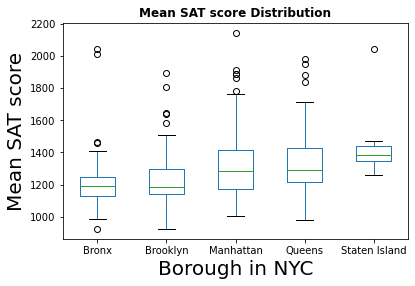

In [69]:
# Create a boxplot
bplot = df1_SAT.boxplot(by='Borough', 
                       column=['Total'], 
                       grid=False)

# Finetune the boxplot
bplot.set_xlabel("Borough in NYC", fontsize=20)
bplot.set_ylabel("Mean SAT score", fontsize=20)
plt.suptitle("")
plt.title("Mean SAT score Distribution",fontweight="bold")

**Explanations**: 
In this boxplot, we can see the distribution of mean SAT score of each borough.

**Concern 2: Plot the relationship between mean SAT score and student enrollment**

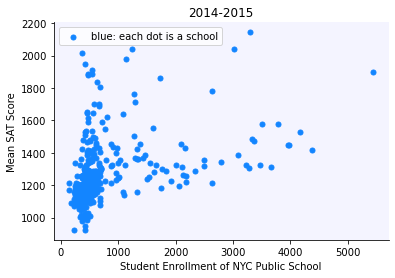

In [9]:
# Create a scatter plot 
fig, ax = plt.subplots()
df1_SAT.plot(kind="scatter", x="Student_Enrollment", y="Total", ax=ax, s=25, 
             color="#1385ff", label = 'blue: each dot is a school')

# Finetune the scatter plot
ax.set_title("2014-2015")
ax.set_ylabel("Mean SAT Score")
ax.set_xlabel("Student Enrollment of NYC Public School")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
back_color = (244/255, 244/255, 255/255)
ax.set_facecolor(back_color)

**Explanations:**
In this scatter plot, we can see the correlation between mean SAT score and school's student enrollment

### Maps of NYC counties

**In this part, we'll create maps showing mean SAT score for each Zip Code level in** 
Kings County and New York City. 

In [11]:
# Let's get the county shapefile and the zip code shapefile
us_county_df = gpd.read_file("tl_2019_us_county.shp")
us_zip_code_df = gpd.read_file("tl_2019_us_zcta510.shp")

In [12]:
# Let's look at variables in us_zip_code_df
us_zip_code_df.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."


**Explanations:**
Looking at some lines from us_zip_code_df, we know we need to use variable "ZCTA5CE10" to merge later. 

1. **Now that we've got our shapefiles ready, let's look at Kings County (which is Brooklyn Borough)**

In [13]:
# Let's create a new dataframe with unique Zip Code names, for Kings County
df1_SAT_kings_county = df1_SAT.loc[df1_SAT['Borough'] == 'Brooklyn']

df1_SAT_Zip = df1_SAT_kings_county[['Zip_Code', 'Total']]

grouped_Zip = df1_SAT_Zip.groupby("Zip_Code")

mean_each_Zip = grouped_Zip.mean()

mean_each_Zip = mean_each_Zip.reset_index()
mean_each_Zip.head()

,Zip_Code,Total
0,11201,1217.800000
1,11203,1186.142857
2,11204,1290.000000
3,11205,1195.666667
4,11206,1291.750000


**Explanations:**
Looking at mean_each_Zip, we know we'll use variable "Zip_Code" to merge later.

In [14]:
# Let's store us_zip_code data into temp_df, and use temp_df to merge and plot.
temp_df = us_zip_code_df.copy()

temp_df["ZCTA5CE10"] = temp_df["ZCTA5CE10"].astype(str).astype(int)

# Merge Zip code shapefile with mean_each_Zip dataframe, and name it "merge_zipcode_score"
merge_zipcode_score = temp_df.merge(mean_each_Zip, 
                                    left_on="ZCTA5CE10", 
                                    right_on="Zip_Code", 
                                    how="inner")

# Create a new column called "Average % SAT Score"; 
# the total SAT score in 2014-2015 year was 2400. 
merge_zipcode_score["Average % SAT Score"] = merge_zipcode_score["Total"]/2400
merge_zipcode_score.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,Zip_Code,Total,Average % SAT Score
0,11225,11225,B5,G6350,S,2289259,0,+40.6630459,-073.9542193,"POLYGON ((-73.96479 40.66205, -73.96470 40.662...",11225,1204.5,0.501875
1,11226,11226,B5,G6350,S,3339497,0,+40.6464480,-073.9566488,"POLYGON ((-73.96755 40.64768, -73.96666 40.648...",11226,1199.4,0.499750
2,11229,11229,B5,G6350,S,5592659,143662,+40.6012928,-073.9444926,"POLYGON ((-73.96231 40.60999, -73.96137 40.610...",11229,1386.0,0.577500
3,11230,11230,B5,G6350,S,4767216,0,+40.6221642,-073.9651104,"POLYGON ((-73.97952 40.62937, -73.97951 40.629...",11230,1451.0,0.604583
4,11231,11231,B5,G6350,S,3681946,66967,+40.6779162,-074.0051543,"POLYGON ((-74.02002 40.67705, -74.01954 40.677...",11231,1216.0,0.506667


**Explanations:**
Here we merged datasets we needed. Next step is to plot data on Kings county map.

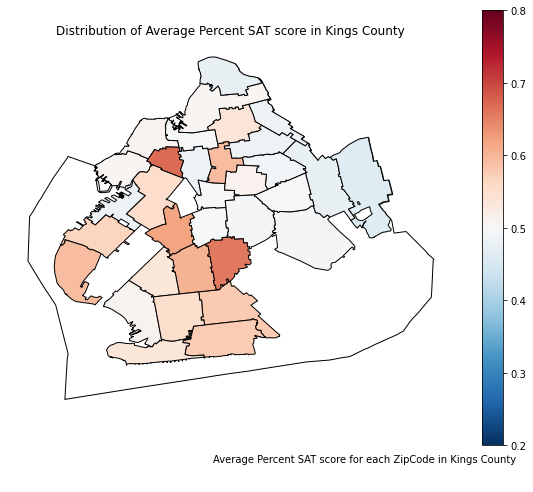

In [15]:
# Finally create the map of Kings County, New York City
fig, gax = plt.subplots(figsize = (10,8))

# Plot the Kings County
us_county_df = us_county_df.loc[us_county_df['STATEFP'] == '36']
us_county_df.query("COUNTYFP == '047'").plot(ax=gax, 
                                             edgecolor="black", 
                                             color="white")

# Plot and pass 'Average % SAT Score' as the data to color
merge_zipcode_score.plot(ax=gax, 
                         edgecolor='black', 
                         column='Average % SAT Score', 
                         legend=True, 
                         cmap='RdBu_r',
                         vmin=0.2, 
                         vmax=0.8 
)

# Add text to let people know what we are plotting
gax.annotate('Average Percent SAT score for each ZipCode in Kings County',
             xy=(0.40, 0.06),  xycoords='figure fraction')
gax.set_title("Distribution of Average Percent SAT score in Kings County")

# I don't want the axis with long and lat
plt.axis('off')

plt.show()

**Explanations:**
Looking at this plot, we could see how schools in each geographical level (Zip Code) did in 2014-2015 SAT Exam in Kings County, NYC. 

2. **Now let's look at mean SAT score performance in the whole New York City.**
Note that there are five counties in NYC. 

In [50]:
# We need to create a new dataframe with unique Zip Code names, for NYC
NYC_Zip = df1_SAT[['Zip_Code', 'Total']]

NYC_grouped_Zip = NYC_Zip.groupby("Zip_Code")

NYC_Zip_Mean_SAT = NYC_grouped_Zip.mean()

NYC_mean_each_Zip = NYC_Zip_Mean_SAT.reset_index()

# Let's then merge temp_df with NYC_mean_each_Zip
merge_NYC = temp_df.merge(NYC_mean_each_Zip, 
                          left_on="ZCTA5CE10", 
                          right_on="Zip_Code", 
                          how="inner")

# Create a new column called "Average % SAT Score" 
# the total SAT score in 2014-2015 year was 2400
merge_NYC["Average % SAT Score"] = merge_NYC["Total"]/2400
merge_NYC.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,Zip_Code,Total,Average % SAT Score
0,10065,10065,B5,G6350,S,984654,0,+40.7646284,-073.9631438,"POLYGON ((-73.97210 40.76552, -73.97165 40.766...",10065,1297.666667,0.540694
1,10128,10128,B5,G6350,S,1206191,0,+40.7814283,-073.9500104,"MULTIPOLYGON (((-73.93951 40.77922, -73.93957 ...",10128,1300.000000,0.541667
2,10282,10282,B5,G6350,S,177847,55133,+40.7169009,-074.0151190,"POLYGON ((-74.01814 40.71429, -74.01798 40.715...",10282,2144.000000,0.893333
3,10301,10301,B5,G6350,S,9189255,12647,+40.6275046,-074.0943767,"MULTIPOLYGON (((-74.09460 40.61219, -74.09442 ...",10301,1346.333333,0.560972
4,10302,10302,B5,G6350,S,3079121,0,+40.6307157,-074.1377294,"POLYGON ((-74.15198 40.61753, -74.14769 40.622...",10302,1284.000000,0.535000


**Explanations:**
From this data frame we see we'll use Zip Code as geographical level to plot "Average % SAT Score" on NYC map later. 

**Now let's look at SAT score performance in the whole New York City.**

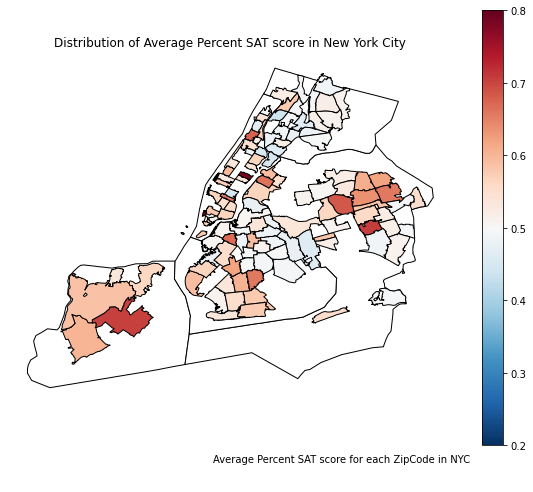

In [17]:
# Create the map of New York City
fig, gax = plt.subplots(figsize = (10,8))

# Plot New York City
us_county_df.query("COUNTYFP == '047' or COUNTYFP == '005' or COUNTYFP == '061'or COUNTYFP == '081'or COUNTYFP == '085'").plot(ax=gax, edgecolor="black", color="white")

# Plot and pass the percent of total SAT score of each ZipCode, 
# 'Average % SAT Score', as the data to color
merge_NYC.plot(ax=gax, 
               edgecolor='black', 
               column='Average % SAT Score', 
               legend=True, 
               cmap='RdBu_r',
               vmin=0.2, 
               vmax=0.8 
)

# Add text to let people know what we are plotting
gax.annotate('Average Percent SAT score for each ZipCode in NYC',
             xy=(0.40, 0.06), 
             xycoords='figure fraction')
gax.set_title("Distribution of Average Percent SAT score in New York City")

# I don't want the axis with long and lat
plt.axis('off')

plt.show()

**Explanations:**
With maps and data we already have, for now it seems that public schools in Staten Island have the best performance in mean SAT scores. 

## Project Three

## 1. Helpful Extra Data
Our **main message/question** is: what factors (x variables) could potentially influence or be correlated with the y variable
(Average SAT score of each public school in NYC). I could add information about median/mean household income of different districts in NYC. I expect a positive relationship between household income and Average SAT Score and between household income 
and student enrollment. My expectation is higher household income indicates larger ability to send more children 
to top schools (higher student enrollment) and receive better education and higher SAT scores. 

**Explanations:**
This data about median household income at zip code level will enhance my paper, since it adds information about the economic situations of people at each zip code level (in each zip code level location). We can scrape this data from http://zipatlas.com/us/ny/new-york/zip-code-comparison/median-household-income.htm
I'm going to merge this data with my original data through a common column, zip code. By using the information about mean household income of each zip level, we can find potential correlation between household income and students' performances in SAT. This could possibly add insights to the research question "which variables influence/correlate with students' performances in SAT in NYC". 

## 2. Challenges of Scraping the Data
I need to run my program over time (yearly) to generate this data because household incomes need to be collected every year. 
(Household incomes could change from year to year). 

One of the biggest challenges is that this data itself is updating from time to time. I'll have to re-run my program each time it is updated. 

## 3. Scraping data from the website of interest

#### We'll scrape data from the website I found. 

#### Part A: Parsing HTML and accessing different elements

In [42]:
import os
proxy="http://127.0.0.1:1081"
os.environ['http_proxy']=proxy
os.environ['HTTP_PROXY']=proxy
os.environ['https_proxy']=proxy
os.environ['HTTPS_PROXY']=proxy

import requests
from bs4 import BeautifulSoup

web_url_zip_income = 'http://zipatlas.com/us/ny/new-york/zip-code-comparison/median-household-income.htm'
response_zip_income = requests.get(web_url_zip_income)

soup_object_zip_income = BeautifulSoup(response_zip_income.content)

**Explanations:**
In this part, we imported packages we need and got the raw code for the website I found and named it 
"response_zip_income". 
Note bs4 is a Python library which parses through HTML content and understands the complete structure of the content.
Then we pass the response_zip_income content to BeautifulSoup() method to get a strutured soup object. 

#### Part B: Turning soup_object into table structure 

In [46]:
table_zip_income = soup_object_zip_income.find_all('table', {'rules':'all'})

all_values_zip_income = table_zip_income[0].find_all('tr')

print(all_values_zip_income[0])
print('--')
print(all_values_zip_income[1])
print('--')
print(all_values_zip_income[2])
print('--')
print(all_values_zip_income[3])
print('--')
print(all_values_zip_income[4])
print('--')
print(all_values_zip_income[5])
print('--')

<tr><td align="center" class="report_header" style="width:0%;">#</td><td align="center" class="report_header" style="width:8%;">Zip Code</td><td align="center" class="report_header" style="width:19%;">Location</td><td align="center" class="report_header" style="width:25%;">City</td><td align="center" class="report_header" style="width:13%;">Population</td><td align="center" class="report_header" style="width:22%;">Avg. Income/H/hold</td><td align="center" class="report_header" style="width:13%;">National Rank</td></tr>
--
<tr><td align="right" class="report_data">1.</td><td align="center" class="report_data"><a href="/us/ny/new-york/zip-10007.htm">10007</a></td><td align="right" class="report_data">40.713973, -74.008336</td><td align="left" class="report_data"><a href="/us/ny/new-york.htm">New York</a>, <a href="/us/new-york.htm">New York</a></td><td align="right" class="report_data">3,522</td><td align="right" class="report_data"><b>$112,947.00</b></td><td align="right" class="report_

**Explanations:**
In this part, we inspected the website and identified the type of HTML tag, which is table; we also identified that table rule is 'all'. We then used these information and the find_all() method to search for the web content. 

Note that tr means table row, th means table header, and td means data cell. From the output, we can see that each 'tr' contains several 'td' tags, which corresponds to different columns in the table.

#### Part C: Extracting Columns and Rows from table

In [53]:
# Create an empty dataframe
zip_income_df = pd.DataFrame(columns = ['zip_code', 'median_household_income_zip'])

# Initialise index to zero
ix = 0 

for row in all_values_zip_income[1:44]:
    # Extract all elements with tag <td>
    zip_income_values = row.find_all('td') 

    # Pick only zip code from the <td> tag, and get rid of '\n' slashes. 
    zip_code = zip_income_values[1].text.strip()
    
    # Turn zip_code into int
    zip_code = int(zip_code)
    
    # Pick median household income from the <td> tag, and get rid of '\n' slashes. 
    median_household_income_zip = zip_income_values[5].text.strip()
    
    # turn median household income into float
    median_household_income_zip = median_household_income_zip.replace( ',', '' )
    median_household_income_zip = median_household_income_zip.replace( '$', '' )
    median_household_income_zip = float(median_household_income_zip)
    
    # Store it in the dataframe as a row
    zip_income_df.loc[ix] = [zip_code, median_household_income_zip] 
    ix += 1

# select the first name if a borough has two names 
#borough_income_df.borough[borough_income_df.borough=='Brooklyn (Kings)'] = 'Brooklyn'
#borough_income_df.borough[borough_income_df.borough=='Staten Island (Richmond)'] = 'Staten Island'

# Print the first 5 rows of the dataframe
zip_income_df.head()

,zip_code,median_household_income_zip
0,10007.0,112947.0
1,10280.0,108536.0
2,10162.0,108416.0
3,10004.0,101868.0
4,10069.0,88091.0


**Explanations:**
In this part, we created an empty dataframe called zip_income_df, and filled it with all the columns 
and rows from original table. We looped over each row and each data cell in the row, and we assigned values
to the 2 columns in zip_income_df. 

We looped over 1-44 rows because there are 43 zip codes in NYC with valid income values.

## 4. Merge scraped data with original data 

In [54]:
# We need to create a new dataframe with unique Zip Code names, for NYC
NYC_Zip_Variables = df1_SAT[['Zip_Code', 'Total', 'Percent_Tested',
                  'Percent_Asian',
                  'Student_Enrollment']]

NYC_grouped_Zip_Variables = NYC_Zip_Variables.groupby("Zip_Code")

NYC_Zip_Mean_SAT = NYC_grouped_Zip_Variables.mean()

NYC_means_each_Zip = NYC_Zip_Mean_SAT.reset_index()

# Let's then merge NYC_means_each_Zi with zip_income_df
merge_income = zip_income_df.merge(NYC_means_each_Zip, 
                          left_on="zip_code", 
                          right_on="Zip_Code", 
                          how="inner")

merge_income.head()

,zip_code,median_household_income_zip,Zip_Code,Total,Percent_Tested,Percent_Asian,Student_Enrollment
0,10004.0,101868.0,10004,1380.250000,0.7695,0.1275,519.25
1,10282.0,86066.0,10282,2144.000000,0.9740,0.7340,3296.00
2,10006.0,81334.0,10006,1268.000000,0.6085,0.1280,747.50
3,10024.0,78066.0,10024,1282.666667,0.6950,0.0410,412.00
4,10021.0,75472.0,10021,1889.000000,0.8600,0.2010,541.00


**Explanations:**
We merged contents from zip_income_df with NYC_means_each_Zip, and the output shows 
median household income and mean of SAT Total Score (and also some other variables)
at each zip code level. 

## 5. Visualize the New Data

Let's create a linear regression model to show the correlation between household income and 
mean of SAT Total score at each zip code level.

In [55]:
# Import packages we need
import numpy as np 
import seaborn as sns
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Regression Score is:
-2.5835137525708385


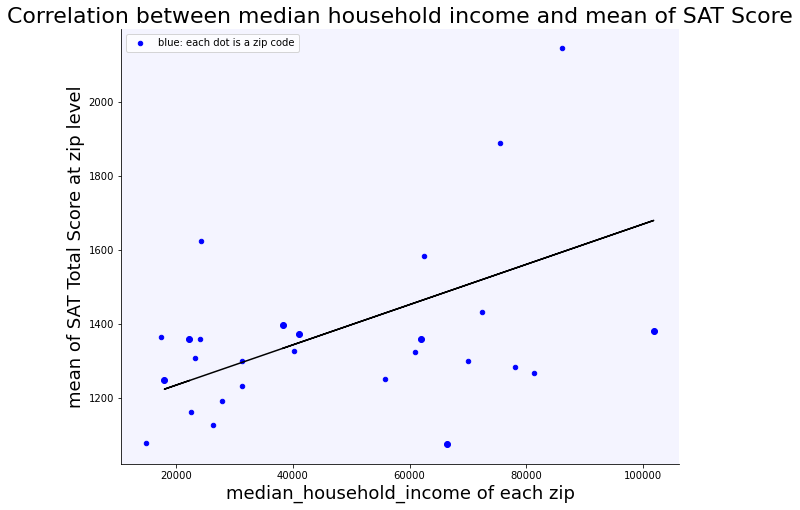

In [57]:
# Draw scatter plot 
fig, gax = plt.subplots(figsize = (10,8))
merge_income.plot(ax = gax, 
                  kind = 'scatter', 
                  x = 'median_household_income_zip', 
                  y = 'Total', 
                  color = 'b', 
                  label = 'blue: each dot is a zip code')

# Label & Annotate the graph
gax.set_xlabel("median_household_income of each zip", 
               fontdict={'fontsize':18})
gax.set_ylabel("mean of SAT Total Score at zip level", 
               fontdict={'fontsize':18})
gax.set_title("Correlation between median household income and mean of SAT Score", 
              fontdict={'fontsize':22})

# Finetune the appearance of graph
gax.spines['right'].set_visible(False)
gax.spines['top'].set_visible(False)
back_color = (244/255, 244/255, 255/255)
gax.set_facecolor(back_color)

# Do linear regression on the data 
X = np.array(merge_income['median_household_income_zip']).reshape(-1, 1) 
y = np.array(merge_income['Total']).reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression() 
  
regr.fit(X_train, y_train)
# Print regression score
print('Regression Score is:')
print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show()

**Explanations:**
Using a linear regression model, we could observe that there exists a relatively moderate
linear relationship between the median household income and SAT score of each zip code region. 
This indicates that the potential X-variable, household income, might actually be correlated with 
or have influences on the Y variable, mean of SAT Total Score. 

The correlation between household income and academic performance is consistent with my expectation. 
Potential economic explanation behind this would be that usually higher income indicates more money
and more resources available for academic support. Richer people might be able to put more efforts
and money to build better teaching facilitie and hire better teachers to prepare for SAT. 

# Final Project 

1. Back in Project One, I determined my X variables to be borough and student enrollment, and my Y variable 
   to be the mean of total SAT Score.
   
   I expect schools in different boroughs to have different SAT performances, that is, SAT performance of a 
   school is correlated with its location through residents' economic conditions; I also expect 
   this relationship to be non-linear, since borough itself is not a quantitative variable. The 
   economic intuition behind this is that districts with higher household incomes tend to have richer 
   families who might potentially be more willing to spend a larger fraction of their incomes inexchange 
   for better educational resources. 
   (This could potentially be illustrated by the median household income data I scraped in Project 3)
  
   For student enrollment, I expect it to have a weak to moderate linear relationship with mean 
   SAT Score of each school. 
   The economic intuition behind this is that more students enrolled might indicate larger school scale and 
   more resources (which would be attractive to high-income families who care about education), 
   though more resouces doesn't necessarily create more educational funds and better SAT performances. 

2. I choose student enrollment and median_household_income to be in the regression, because these two
   X variables are quantitative; their degree of correlation with mean SAT Score could be directly demonstrated. 
   What's more, they can explain my Y variable since I could run both bivariate and multivariate regression models.
   I could investigate whether they have obvious linear relationships with my Y variable or not.
   
   I'll also put other variables including percent_tested and number_tested; together with student enrollment 
   and household income data, they might provide a potentially more comprehensive economic insight to the SAT
   performance of students. 

3. I will run four separate regressions based on several X variables.  

**A**: The 1st regression I will run is a multivariate linear regression to examine the relationship between mean SAT 
Total Score and median household income and student enrollment. 

In [70]:
# First let's add a column to merge_income
merge_income['const'] = 1

# Let's then import packages needed for regressions.
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
import numpy as np

In [75]:
reg_income = sm.OLS(endog=merge_income['Total'], 
                    exog=merge_income[['const', 'median_household_income_zip',
                                      'Student_Enrollment']], \
    missing='drop')
results_income = reg_income.fit()

print(results_income.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     13.96
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           9.53e-05
Time:                        11:44:50   Log-Likelihood:                -174.17
No. Observations:                  27   AIC:                             354.3
Df Residuals:                      24   BIC:                             358.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

**Explanations**: 
Here we created a summary table. The P value of 0.091 is less than 0.1 but greater than 0.05, which indicates 
that the effect of median household income on mean of Total SAT score is moderately strong (there is a moderate correlation between median household income and mean SAT Score). 
What's more, the coefficient of 0.0023 means as median household income increases by 1 unit (dollar), the mean of SAT 
Total Score tends to increase by 0.0023 units. 

For student enrollment, the P value of 0.000 is significant, indicating a strong correlation between student enrollment 
and mean of SAT Total Score. The coiefficient of 0.2562 means as student enrollment rises by 1 unit, mean of SAT
Total Score tends to rise by 0.2562 units. 

An adjusted R-squared of roughly 0.5 indicates a moderate correlation between joint performance of student enrollment
and median household income and mean of SAT Total Score. 

#### Justifications:
I choose to run this regression because I expect a moderate linear correlation between
student enrollment, household income, and mean SAT Score. The economic intuition is that
more student enrollment and more household income together would indicate that a school seems 
more attractive to families with high income who value about education; both high income 
and value on education are necessary factors that would provide better resources for students 
and thus lead to better SAT performances. 

**B**: The 2nd regression I will run is a multivariate linear regression that combines both 
Student_Enrollment and Percent_Tested with mean of SAT score. 

In [76]:
reg_2 = sm.OLS(endog=merge_income['Total'], exog=merge_income[['const', 'Student_Enrollment', 'Percent_Tested']], \
    missing='drop')
results_2_reg = reg_2.fit()

print(results_2_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     36.83
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           4.86e-08
Time:                        11:51:41   Log-Likelihood:                -165.64
No. Observations:                  27   AIC:                             337.3
Df Residuals:                      24   BIC:                             341.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                582.4505    116

**Explanations**: 
Here we created a summary table. For student enrollment, P value of 0.000 is significant, indicating strong 
corrleation between it and mean SAT Score. As student enrollment increases by 1, mean SAT score tends to 
increase by 0.2.

For percent_tested, P value of 0 is significant, indicating a relatively strong effect of percent of 
students taking SAT on mean SAT Score. 

#### Justifications:
I choose to run this regression because I want to examine about the joint effect of 
student enrollment and percent of students taking SAT on my Y variable, mean SAT score.
The economic intuition is that as fraction of students taking the SAT is higher and 
student enrollment is larger, it indicates that students at this school value academic 
performances more and are in need of SAT score in order to apply for colleges.
(These students might come from high-income families that value education much and could pay 
for expensive college tuition)
Also, with more students enrolled and taking SAT, it's more likely for schools to 
put more budget and resources in preparation for SAT.

**C**: The 3rd regression I will run is a multivariate linear regression that combines both 
Student_Enrollment and Number Tested with mean of SAT score. 

In [79]:
df1_SAT['const'] = 1
reg_3 = sm.OLS(endog=df1_SAT['Total'], exog=df1_SAT[['const', 'Student_Enrollment', 'Number Tested']], \
    missing='drop')
results_3_reg = reg_3.fit()

print(results_3_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     120.7
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           4.10e-41
Time:                        11:53:41   Log-Likelihood:                -2408.3
No. Observations:                 374   AIC:                             4823.
Df Residuals:                     371   BIC:                             4834.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1222.9106     11

**Explanations**: 
Here we created a summary table. For student enrollment, P value of 0 indicates strong effect of student enrollment 
on mean SAT Score. Coefficient of -0.27 indicates a slightly negative correlation between student enrollment and 
mean SAT Score. 

For number of students taking SAT, a P value of 0 also indicates it has a relatively strong correlation with the mean 
of total SAT score. 

#### Justifictions:
I choose to run this regression because I want to examine about the joint effect of 
student enrollment and number tested on my Y variable, mean SAT score.
The economic intuition is that the number of students
taking the SAT have correlations with economic conditions of students' families (which could
put money and resources into preparation for SAT), which would potentially 
facilitate SAT performances.

**D**: The 4th regression I will run is a multivariate linear regression that combines both 
median household income and percent tested with mean of SAT score.

In [80]:
reg_4 = sm.OLS(endog=merge_income['Total'], exog=merge_income[['const', 'median_household_income_zip', 
                                                               'Percent_Tested']], \
    missing='drop')
results_4_reg = reg_4.fit()

print(results_4_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     16.64
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           2.92e-05
Time:                        11:55:41   Log-Likelihood:                -172.84
No. Observations:                  27   AIC:                             351.7
Df Residuals:                      24   BIC:                             355.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

**Explanations**: 
Here we created a summary table. For median household income, P value of 0.12 is a bit large, which indicates a 
relatively moderate effect of household income on mean SAT Score. Coefficient of 0.002 indicates a slightly positive correlation between median household income and mean SAT Score. 

For percent of students taking SAT, a P value of 0 is significant and indicates it has a relatively strong correlation with the mean of total SAT score.

#### Justifictions:
I choose to run this regression because I want to examine about the joint effect of 
median household income and percent tested on my Y variable, mean SAT score.
The economic intuition is that larger fraction of students
taking the SAT indicate better economic conditions of students' families to
put money and resources into preparation for SAT, which would potentially 
facilitate better SAT performances. 
What's more, when larger fraction of students take SAT, 
schools might tend to hire more good teachers to teach SAT materials.

#### Preferred specification: 
I prefer regression 2 because student enrollment and percentage of students taking SAT
can be intuitively linked with a school's educational resources and the economic conditions
(such as incomes) of students' families, thus would possibly provide reasoning for the 
variation in SAT performances across schools. Also, the regression result table
shows that correlation between these two variables and our Y variable is relatively strong. 

#### Evaluating regressions:
While evaluating my 4 regression models, it is worth noting that there exists some slight inconsistencies 
in the results they produced. For instance, the direction of correlation between student enrollment and mean of SAT Total Score are different in regression A, B, and C, indicating there might be numerical problems or problems in our regressions. 

I should use the summary statistics produced in regression tables to assess performances of my regressions. Specifically, 
I compare coefficients for the same variable across regressions. For example, I compare coefficient for student enrollment 
across regressions and found that this coefficient is negative in regression C yet positive in regression A and B. This indicates inconsistencies across my regression models. 

I should also use the notes at the end of table to evaluate my regression models. For example, the notes mention 
'multicollinearity' in all 4 regression tables, indicating that my X variables themselvs are highly related in these
multivariate regression models. 

#### Regression Results:
From the above 4 regressions, we understand that there exists moderate
correlation between student enrollment, median household income and mean SAT score of schools. 
We also understand that these two variables also seem to have a moderate to strong relationship with
SAT performance of a school when combined with other factors. 
These results facilitate in answering the resarch question since they could provide intuition
of the tendency of a school's average SAT performance when we know the behaviors of our X variables. 

# Conclusion

In this paper, I defined two X variables: **student enrollment and borough**, together with an imported variable from
the extra data I scraped: **median household income** at zip code level to answer our economic question "How would student enrollment, borough, and median household income potentially correlate with SAT performance". 

To begin with, in Project One, I cleaned and collected the data I needed and provided some summary statistics of my X and Y variables.

Then in Project Two, I plotted relationships of concern and put my X and Y variables on graphs. I also created heat maps which 
shows distribution of mean SAT Score at zip code levels in **both Brooklyn Borough and NYC**. In this way I provided answers
for the question "How are the locations(borough) of each school correlated with the school's overall performance in SAT Exam",
as the heat maps show that performance of mean SAT score did vary across boroughs. 

In Project Three, I scraped extra data of median household income of NYC at zip code level and merged it with original data. 
I also drew a linear regression plot to demonstrate the correlation between median household income and mean SAT score. 
In this way I provided insights for the subsequent question "Does median household income correlate with 
mean SAT score of a school". 

Finally in Final Project, I put several variables into my four regressions such as student enrollment, median household income, and mean of SAT Total Score. By conducting multivariate regressions, I provided insights for the main question "Is the overall performance on SAT related with school's number of student enrollment". 

We also reached the following conclusions (main results):
There exists a moderate positive correlation both between median household income and SAT performance and between 
student enrollment and correlation. From the first regression table of final project, we could also see that jointly, 
when median household income increases by 1 unit (dollar), the mean SAT score of a district (zip code region) tends to 
increase by 0.0023; when student enrollment increases by 1 unit, the mean SAT score tends to increase by 0.2562. 

The mean SAT score varies across boroughs. From the heat maps we could see that Staten Island has the best overall SAT
performance, while Brooklyn and Bronx have the worst overall SAT performances. 

To conclude with, we have reached valid findings to answer our economic question which states the correlation between student enrollment, borough, median household income, and mean of SAT Total score.

# Future Work

There are still some questions unanswered in our paper. For example, we didn't investigate into the correlation between different districts (such as boroughs) and median household income of each district. We didn't talk about economic features like demographic structure or government intervention on school education either, which could also probably be correlated with SAT performance of a school. In further research, we could try to add more data on government intervention or demographic structure as well. 

There are also apparent limitations of my work. For instance, in Project 3, the correlation score of my linear regression plot between median household income and mean SAT score is not as significant as I expected; from the plot itself, correlation between these two variables also doesn't seem as strong as I expected.

In order to improve my paper and limitations, I could scrape more data on other economic features that might correlate
with mean SAT score. I could also involve more complicated regression models (such as using regression tree to plot the 3D relationship between student enrollment, median household income, and mean of SAT Total Score) in order to form a 
more comprehensive paper. 